In [116]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import csv
import datetime as dt
import matplotlib.dates as mdates
import numpy as np
import math

In [117]:
with open('speeches_clean.csv', newline = '') as file:
    reader = csv.reader(file)
    data = list(reader)

df = pd.DataFrame(data)
df.columns = ['Title', 'Date', 'Text']

In [118]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['Polarity'] = df['Text'].apply(pol)
df['Subjectivity'] = df['Text'].apply(sub)

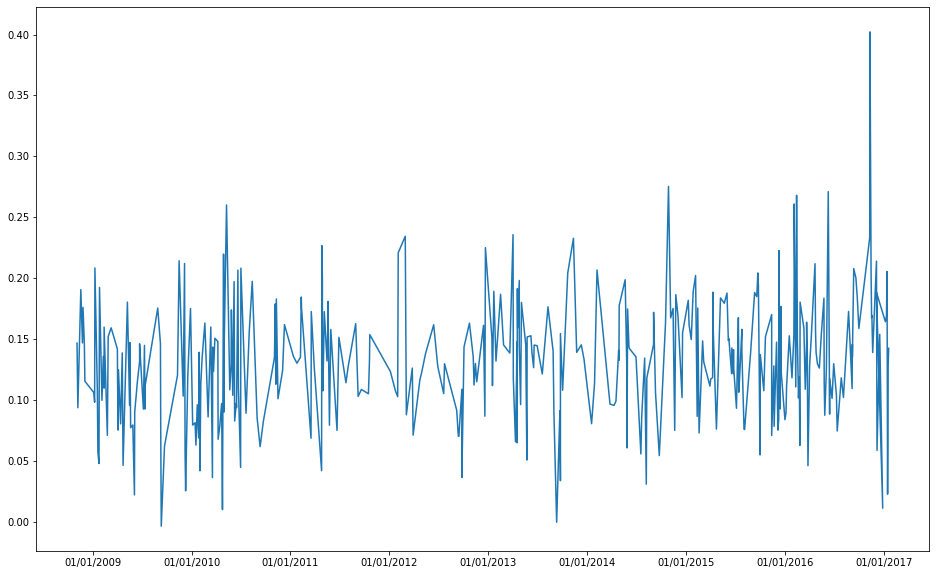

In [119]:
dates = [dt.datetime.strptime(d,'%d %b %Y').date() for d in df['Date']]

fig, axs = plt.subplots(1,1, figsize = (16, 10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
axs.plot(dates, df['Polarity'])

In [131]:
def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [138]:
speech_split = []
for i in [0, 52, 69, 118, 135, 159, 163]:
    speech_split.append(split_text(df.iloc[i, 2])) # 0: First Victory Speech, 52: Nobel Prize,
                # 69: Health Care Law, 118: Death of Bin-Laden, 135: End of Iraq War, 159: Second Victory Speech,
                #163: Sandy Hook School Shooting
speech_amount = len(speech_split)

In [139]:
speech_pol = []
for i in range(speech_amount):
    pol = []
    for j in range(10):
        pol.append(TextBlob(speech_split[i][j]).sentiment.polarity)
    speech_pol.append(pol)

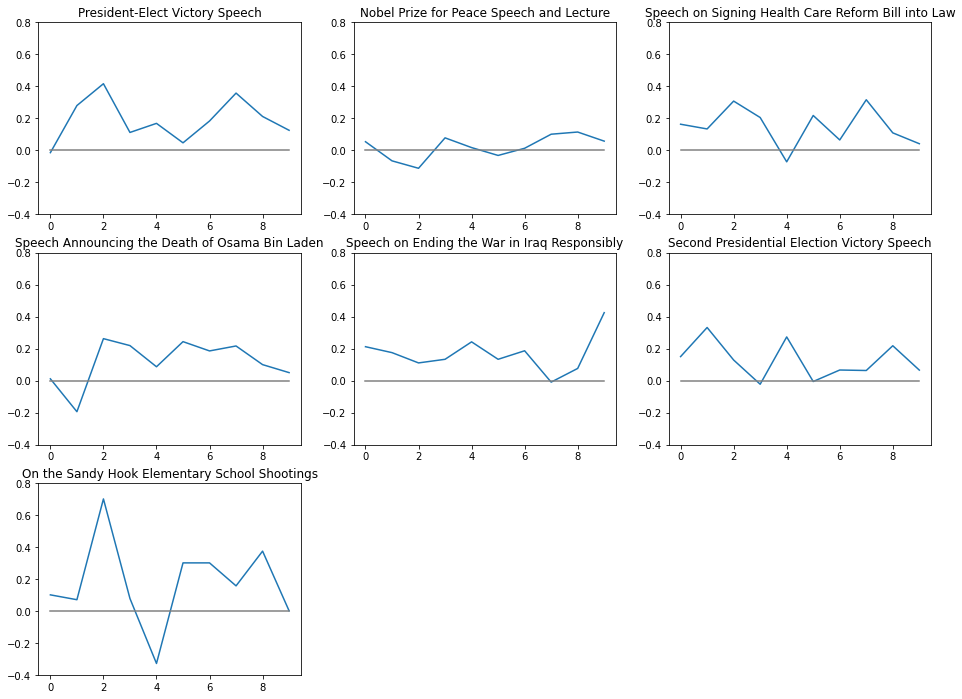

In [140]:
plt.rcParams['figure.figsize'] = [16, 12]
n=0
nw = [0, 52, 69, 118, 135, 159, 163]
for nr in range(0,speech_amount):    
    plt.subplot(math.ceil(speech_amount/3), 3, n+1)
    n+=1
    
    plt.plot(speech_pol[nr])
    plt.plot(np.arange(0,10), np.zeros(10),color='grey')
    plt.title(df.iloc[nw[n-1],0])
    
    plt.ylim(ymin=-.4, ymax=.8)
    
plt.show()